## Loan Project - clustering

_**Importing the required libraries & packages**_

In [1]:
import pandas as pd
import os
import pyodbc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering 
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import pickle
import warnings
warnings.filterwarnings('ignore')

_**Changing the default working directory path&Reading the Dataset using Pandas Command**_

In [2]:
os.chdir('C:\\Users\\mural\\Desktop\\loan project clustering')

In [3]:
server='BALAJIMOHAN\SQLEXPRESS'
db='LoanProject'

## Data Reading:

**Processed the input data using Structured Query Language _(SQL)_ and done some cleaning, with the help <span style = 'color : red'> pyodbc </span> package connecting Jupyter Notebook with SQL server in the following 3 cells.**

In [4]:
conn=pyodbc.connect('DRIVER={sql server};SERVER='+server+';DATABASE='+db+';UID=Balaji;PWD=18061410;trusted connection=yes')

In [5]:
sql='select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.disposition_account_id'

_**Reading the SQL File using Pandas Command**_

In [6]:
df=pd.read_sql(sql,conn)

**Exporting the Data after processing in SQL,the final data is converted to comma seperated values _(CSV)_ file**

In [7]:
df.to_csv('Loan Final Data.csv',index=False)

_**Checking the Null Values of all the Columns in the Dataset**_

In [8]:
df.isna().sum()

card_id                     0
disp_id                     0
type                        0
issued                      0
disposition_account_id      0
disposition_client_id       0
disposition_type            0
client_id                   0
birth_number                0
district_id                 0
A1                          0
A2                          0
A3                          0
A4                          0
A5                          0
A6                          0
A7                          0
A8                          0
A9                          0
A10                         0
A11                         0
A12                         0
A13                         0
A14                         0
A15                         0
A16                         0
order_id                    0
bank_to                     0
account_to                  0
amount                      0
k_symbol                    0
account_date                0
account_district_id         0
account_fr

_**Getting to Describe the Numerical columns of the Dataset**_

In [9]:
df.describe()

,card_id,disp_id,disposition_account_id,disposition_client_id,client_id,birth_number,district_id,A1,A4,A5,...,account_district_id,trans_id,account_id,amount,balance,account,loan_id,loan_amount,loan_duration,loan_payments
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02,868.000000,...,868.000000,8.680000e+02,868.000000,868.000000,868.000000,2.050000e+02,868.000000,868.000000,868.000000,868.000000
mean,907.690092,8139.987327,6767.154378,8265.955069,8265.955069,685696.934332,37.332949,37.332949,1.407953e+05,41.294931,...,39.427419,2.276811e+06,6767.154378,13533.202650,51020.558765,3.346704e+07,6374.570276,124083.428571,27.069124,4954.557604
std,238.683175,3244.507382,2715.120458,3376.937067,3376.937067,149850.689100,23.864496,23.864496,1.281183e+05,23.132398,...,25.833877,9.593156e+05,2715.120458,15346.995182,28746.846180,3.115044e+07,561.596458,74014.846356,16.620600,2019.525078
min,159.000000,946.000000,790.000000,946.000000,946.000000,351003.000000,1.000000,1.000000,5.131300e+04,0.000000,...,1.000000,2.320620e+05,790.000000,5.400000,200.000000,0.000000e+00,5126.000000,14628.000000,12.000000,1177.000000
25%,844.000000,6567.000000,5442.000000,6567.000000,6567.000000,570929.000000,14.000000,14.000000,8.651300e+04,21.000000,...,12.000000,1.602809e+06,5442.000000,306.224991,31045.900391,7.772154e+06,6112.000000,78939.000000,12.000000,3222.000000
50%,857.000000,6789.000000,5622.000000,6789.000000,6789.000000,780907.000000,32.000000,32.000000,1.050580e+05,34.000000,...,45.000000,1.852832e+06,5622.000000,7000.000000,47310.150391,2.417564e+07,6150.000000,105804.000000,24.000000,4579.000000
75%,1100.000000,11101.000000,9265.000000,11409.000000,11409.000000,790326.000000,57.000000,57.000000,1.619540e+05,65.000000,...,62.000000,3.314625e+06,9265.000000,22933.750000,67505.726562,6.987126e+07,6888.000000,174744.000000,36.000000,6918.000000
max,1223.000000,13231.000000,11013.000000,13539.000000,13539.000000,805502.000000,74.000000,74.000000,1.204953e+06,98.000000,...,74.000000,3.675971e+06,11013.000000,63366.000000,143605.703125,9.867897e+07,7240.000000,331560.000000,60.000000,7281.000000


_**Getting the information such as counts, datatypes of all the columns in the dataset**_

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   card_id                 868 non-null    int64  
 1   disp_id                 868 non-null    int64  
 2   type                    868 non-null    object 
 3   issued                  868 non-null    object 
 4   disposition_account_id  868 non-null    int64  
 5   disposition_client_id   868 non-null    int64  
 6   disposition_type        868 non-null    object 
 7   client_id               868 non-null    int64  
 8   birth_number            868 non-null    int64  
 9   district_id             868 non-null    int64  
 10  A1                      868 non-null    int64  
 11  A2                      868 non-null    object 
 12  A3                      868 non-null    object 
 13  A4                      868 non-null    int64  
 14  A5                      868 non-null    in

**Finding the shape of the dataset**

In [11]:
df.shape

(868, 50)

**Since it has many columns, to extract the columns we need getting all the column names.so, that we can identify the necessary column**

In [12]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'disposition_account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'account_frequency', 'trans_id', 'account_id',
       'date', 'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'loan_duration',
       'loan_payments', 'loan_status'],
      dtype='object')

**Assigning the independent variable with only two columns i.e., `loan_amount`,`balance` since it is Clustering Model there's no dependent variable.**

In [13]:
x = df[['loan_amount','balance']]

## Data Preprocessing:

**Standardizing the independent variable of the dataset**

In [14]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)

**Finding the WCSS(within cluster sum of square) values using KMeans Clsutering Model.**

In [15]:
wcss = []
for i in range(2,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(sc_x)
    wcss.append(kmeans.inertia_)
display(wcss)

[1073.9739233731987,
 674.5893188666905,
 505.203520237413,
 392.7910556924834,
 303.49754991606807,
 264.7940715229605,
 227.1821380633441,
 197.35568209195054,
 170.76020918673802,
 147.03189927429815,
 130.395723997691,
 115.75544933908006,
 105.34804931187477]

**Plotting the Line Graph with WCSS values to get the exact ideal number of clusters to be created using KMeans Clsutering Algorithm and saving the PNG file of the graph**

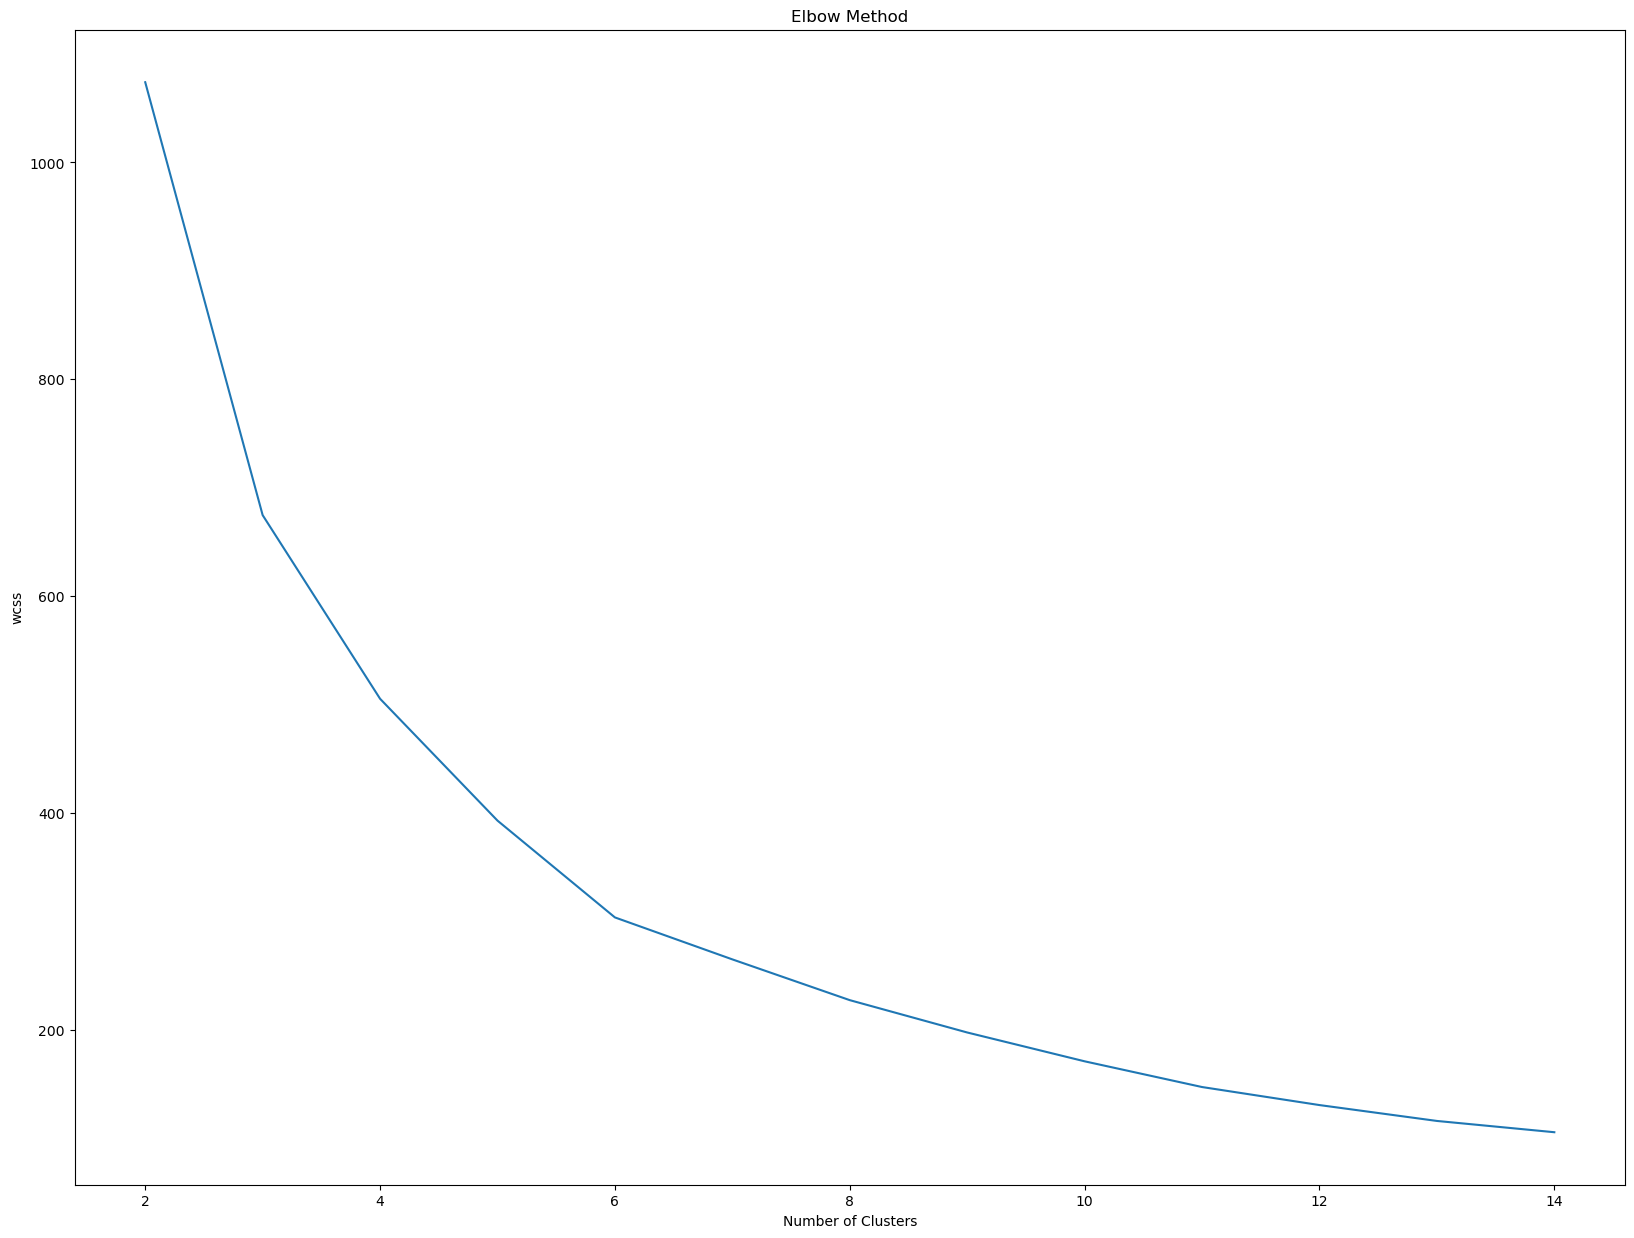

In [16]:
rcParams['figure.figsize'] = (20,15)
plt.plot(range(2,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.savefig('Elbow Method.png')
plt.show()

**Fitting the KMeans Clustering model with the ideal number of clusters found from Elbow Method Graph and getting the dataset belonging to the cluster.**

In [17]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans = kmeans.fit(sc_x)
y_kmeans = kmeans.labels_

**Plotting the Scatter plot Graph with the independent variable and the cluster which it belongs and saving the PNG file.**

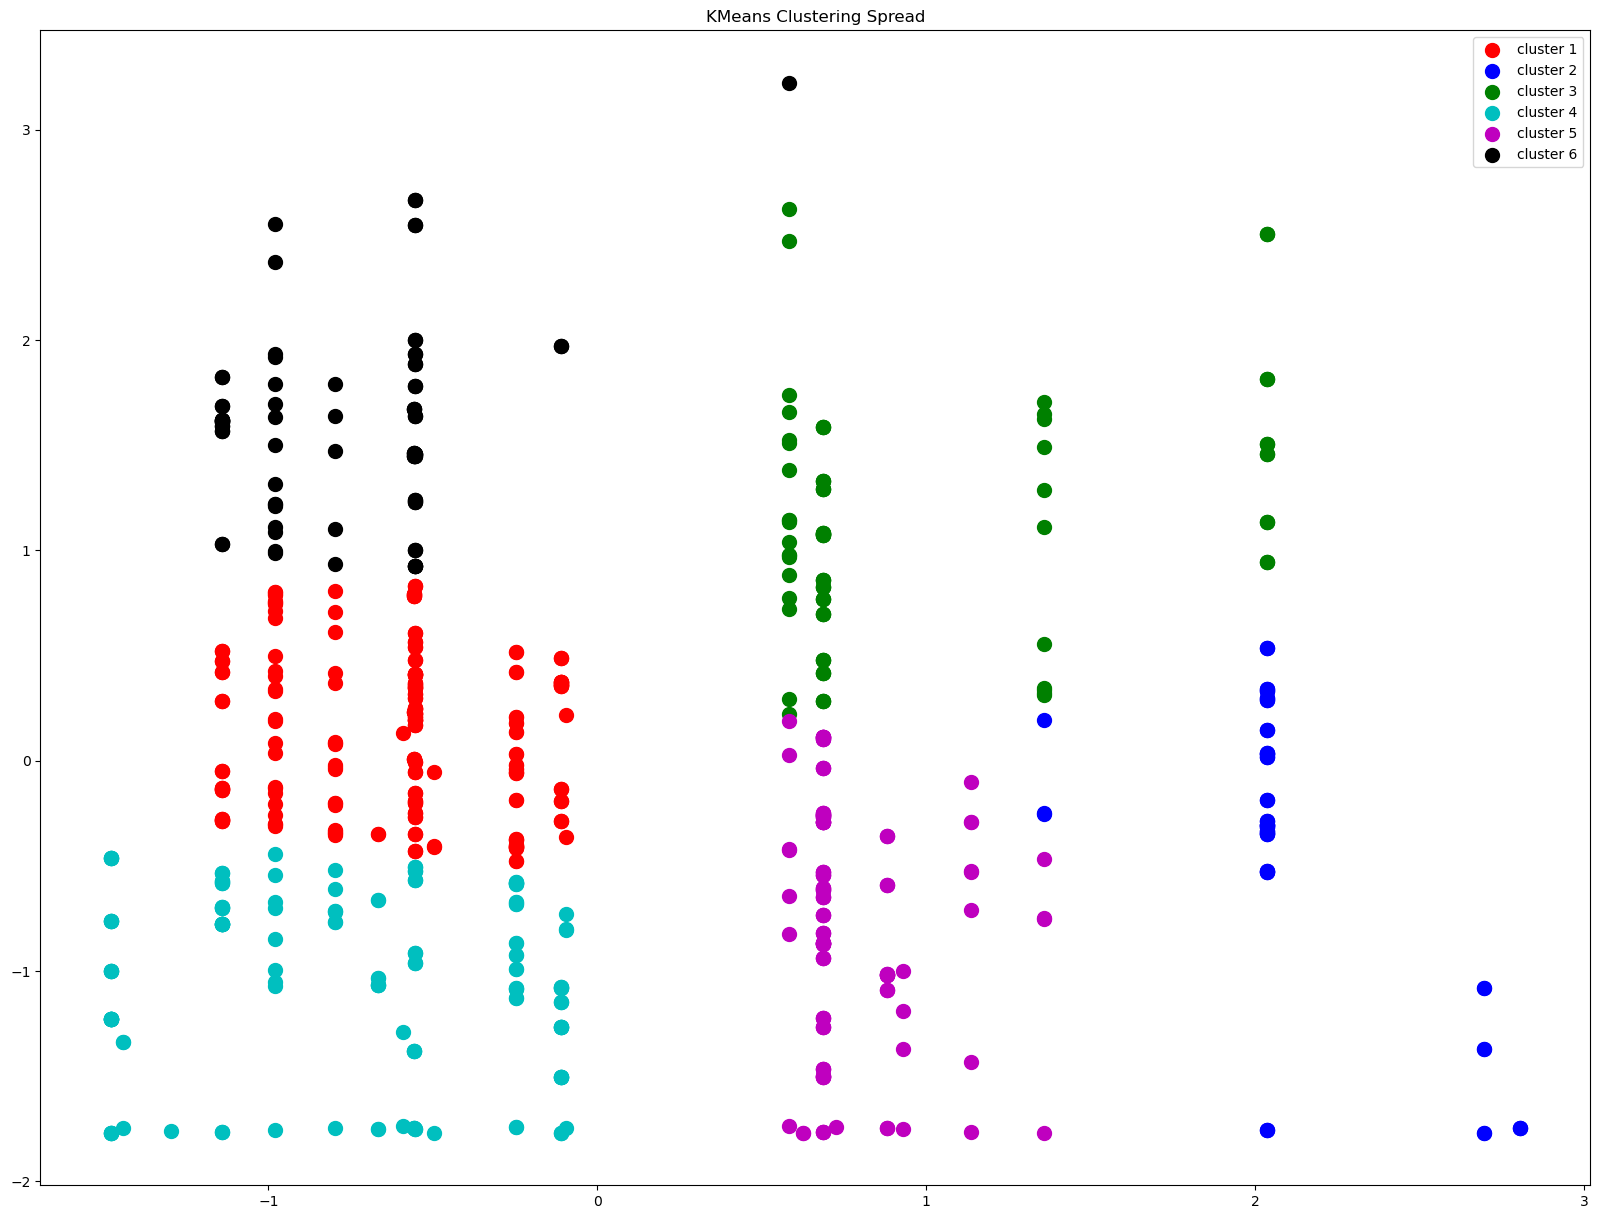

In [18]:
plt.scatter (sc_x[y_kmeans==0,0],sc_x[y_kmeans==0,1],s=100,c='r',label='cluster 1')
plt.scatter (sc_x[y_kmeans==1,0],sc_x[y_kmeans==1,1],s=100,c='b',label='cluster 2')
plt.scatter (sc_x[y_kmeans==2,0],sc_x[y_kmeans==2,1],s=100,c='g',label='cluster 3')
plt.scatter (sc_x[y_kmeans==3,0],sc_x[y_kmeans==3,1],s=100,c='c',label='cluster 4')
plt.scatter (sc_x[y_kmeans==4,0],sc_x[y_kmeans==4,1],s=100,c='m',label='cluster 5')
plt.scatter (sc_x[y_kmeans==5,0],sc_x[y_kmeans==5,1],s=100,c='k',label='cluster 6')
plt.legend()
plt.title('KMeans Clustering Spread')
plt.savefig('KMeans Clustering Spread.png')
plt.show()

**Merging the Cluster Number , adding the seperate column for it, also getting the`accoun id` coilumn from the dataset with assigned independent variable and adding New Column names for the existing columns of the resultant     dataset`AccountID`,`Loan_Amount`,`Balance`,
`Cluster Number`.Displayimg the resulting dataset**         

In [19]:
result = pd.concat([df.iloc[:,4],pd.DataFrame(x),pd.DataFrame(y_kmeans)],axis=1)
result.columns=['Account ID','Loan_Amount','Balance','Cluster Number']
display(result)

,Account ID,Loan_Amount,Balance,Cluster Number
0,790,208128,300.000000,4
1,790,208128,9900.000000,4
2,790,208128,42599.000000,4
3,790,208128,42658.199219,4
4,790,208128,48117.199219,4
...,...,...,...,...
863,11013,274740,94294.000000,2
864,11013,274740,59294.000000,1
865,11013,274740,59527.101562,1
866,11013,274740,92893.101562,2


**from the resultant dataset , found that `Balance` column is Currency value but the readability is much worse since it has many figures after the decimal point. So, rounding of the `Balance` column and updating the rounding value to the `Balance` column in the independent variable and displaying the independent variable after updating.**

In [20]:
rounded_balance = round(x['balance'],2)
x.update({'balance' :rounded_balance})
display(x)

,loan_amount,balance
0,208128,300.0
1,208128,9900.0
2,208128,42599.0
3,208128,42658.2
4,208128,48117.2
...,...,...
863,274740,94294.0
864,274740,59294.0
865,274740,59527.1
866,274740,92893.1


**Now again merging the columns just as like with updated column names as `Account ID`,`Loan_Amount($)`,`Balance($)`,`Cluster Number` before since we updated the independent variable the readability of all the columns is pretty good.**

In [21]:
result = pd.concat([df.iloc[:,4],pd.DataFrame(x),pd.DataFrame(y_kmeans)],axis=1)
result.columns=['Account ID','Loan Amount($)','Balance($)','Cluster Number']
display(result)

,Account ID,Loan Amount($),Balance($),Cluster Number
0,790,208128,300.0,4
1,790,208128,9900.0,4
2,790,208128,42599.0,4
3,790,208128,42658.2,4
4,790,208128,48117.2,4
...,...,...,...,...
863,11013,274740,94294.0,2
864,11013,274740,59294.0,1
865,11013,274740,59527.1,1
866,11013,274740,92893.1,2


**Grouping by the clsuter number with respect to `loan Amount($)`and `Balance($)` to get the Minimum,Maximum values of Loan Amount,Balance and the number of values for each cluster.**

In [22]:
result.groupby(['Cluster Number']).agg({'Loan Amount($)':[np.max,np.min],'Balance($)':[np.max,np.min]})

Loan Amount($)         Balance($)         
                         amax    amin       amax     amin
Cluster Number                                           
0                      117024   39576    74831.8  37262.7
1                      331560  224604    66391.9    200.0
2                      274740  167100   126386.4  57437.4
3                      117024   14628    38231.6    200.0
4                      224604  167100    56384.1    200.0
5                      167100   39576   143605.7  77560.3

**loading the pickle file with K-Means Clsutering model**

In [23]:
pickle.dump(kmeans,open('KMeans.pkl','wb'))